In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [3]:
df=pd.read_csv("iris datas.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.shape

(150, 5)

In [5]:
from sklearn.preprocessing import LabelEncoder
species = LabelEncoder()
datas=df['species']=species.fit_transform(df['species'])

<Figure size 100x100 with 0 Axes>

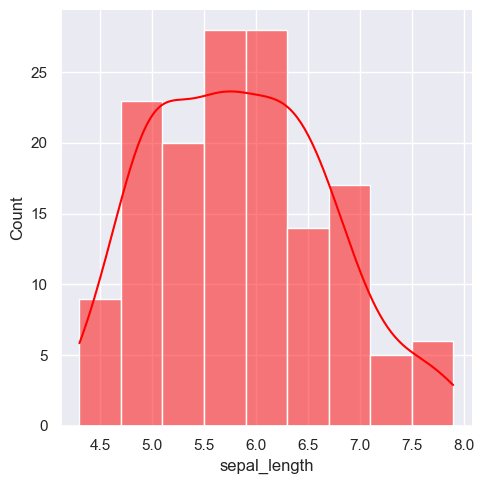

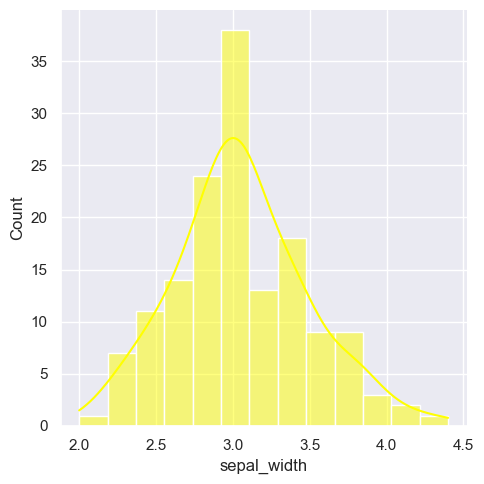

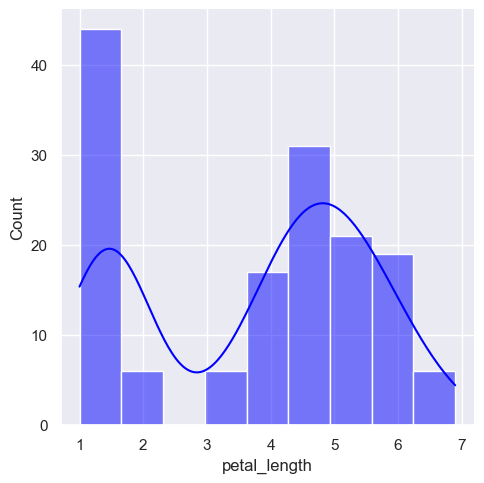

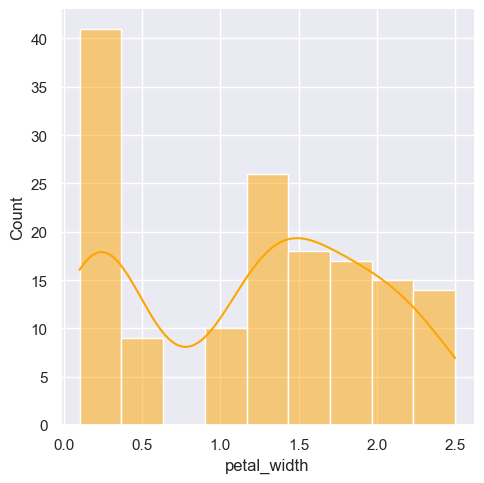

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 1))

sns.displot(df['sepal_length'],kde=True,color="red")


sns.displot(df['sepal_width'],kde=True,color="yellow")


sns.displot(df['petal_length'],kde=True,color="blue")


sns.displot(df['petal_width'],kde=True,color="orange")
plt.show()

<Axes: >

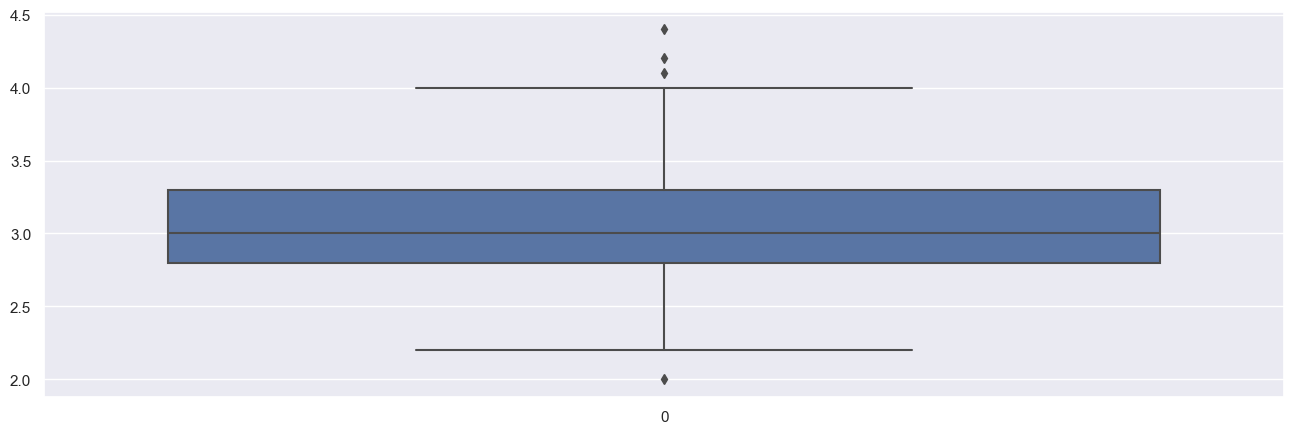

In [35]:
sns.boxplot(df['sepal_width'])

In [40]:
# IQR

percentile25 = df['sepal_width'].quantile(0.25)
percentile75 = df['sepal_width'].quantile(0.75)

In [41]:
percentile25

2.8

In [42]:
percentile75

3.3

In [45]:
iqr = percentile75-percentile25

In [46]:
iqr

0.5

In [47]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [48]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 4.05
Lower limit 2.05


In [50]:
# Finding outliers 
df[df['sepal_width'] > upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [51]:
df[df['sepal_width'] < lower_limit]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,1


In [62]:
# Trimming 
new_df = df[df['sepal_width'] < upper_limit] 

In [64]:
new_dfs =  new_df[new_df['sepal_width'] > lower_limit]

In [65]:
new_dfs

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [66]:
new_dfs.shape

(146, 5)

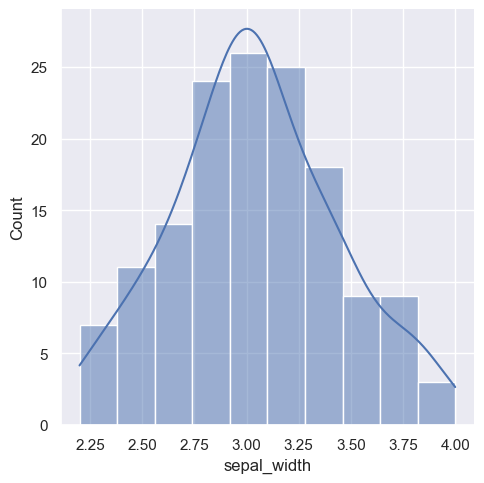

In [68]:
sns.displot(new_dfs['sepal_width'],kde = True)

<Axes: >

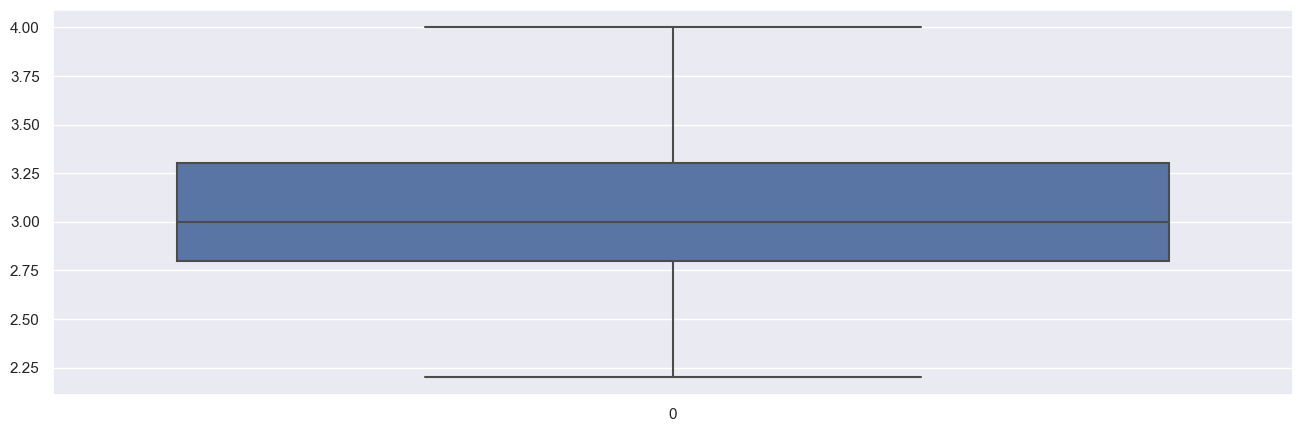

In [69]:
sns.boxplot(new_dfs['sepal_width'])

In [71]:
# Capping 

new_df_cap = df.copy()

new_df_cap['sepal_width'] = np.where(
    new_df_cap['sepal_width'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['sepal_width'] < lower_limit,
        lower_limit,
        new_df_cap['sepal_width']
    )
)

In [ ]:
# np.where(condtion,true,false)

In [73]:
new_df_cap.shape

(150, 5)

<Axes: >

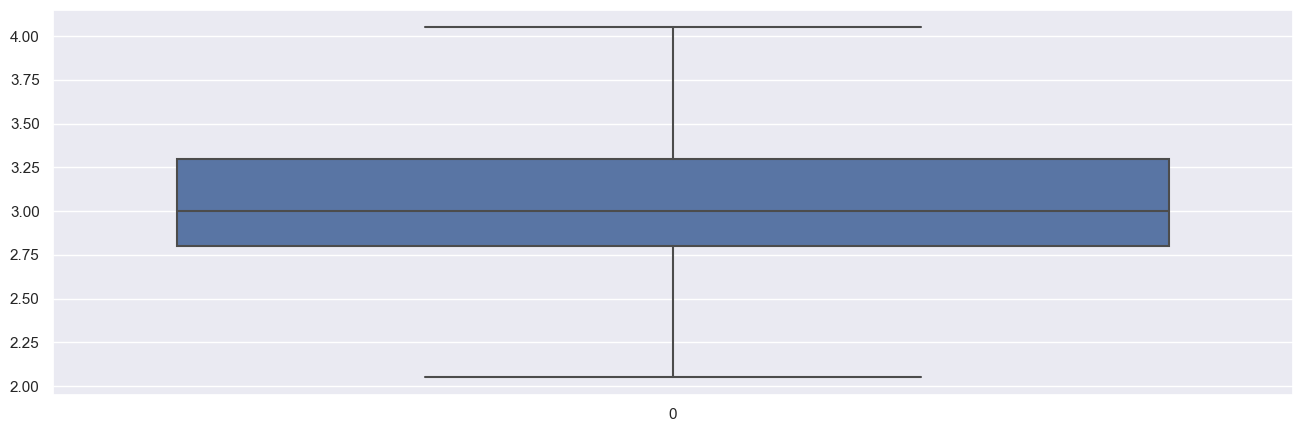

In [74]:
sns.boxplot(new_df_cap['sepal_width'])